In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [2]:
print(torch.cuda.is_available())

True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
resize=(224, 224)
batch_size = 100
trans = transforms.Compose([transforms.Resize(resize),
                            transforms.ToTensor()])
train_data_resized = torchvision.datasets.FashionMNIST(root='./data',
                                               train=True,
                                               transform=trans,
                                               download=True)
val_data_resized = torchvision.datasets.FashionMNIST(root='./data',
                                             train=False,
                                             transform=trans)
train_loader_resized = torch.utils.data.DataLoader(dataset=train_data_resized,
                                           batch_size=batch_size,
                                           shuffle=True, num_workers=os.cpu_count())
val_loader_resized = torch.utils.data.DataLoader(dataset=val_data_resized,
                                         batch_size=batch_size,
                                         shuffle=False, num_workers=os.cpu_count())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
train_data = torchvision.datasets.FashionMNIST(root='./data',
                                               train=True,
                                               transform=transforms.ToTensor(),
                                               download=True)
val_data = torchvision.datasets.FashionMNIST(root='./data',
                                             train=False,
                                             transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True, num_workers=os.cpu_count())
val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                         batch_size=batch_size,
                                         shuffle=False, num_workers=os.cpu_count())

In [6]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

In [7]:
class AlexNet(nn.Module):
  def __init__(self, lr=0.01, num_classes=10):
    super(AlexNet, self).__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes)
    )
    self.net.apply(init_cnn)
  def forward(self, x):
    return self.net(x)
  def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [8]:
class AlexNet_Modified(nn.Module):
  def __init__(self, lr=0.01, num_classes=10):
    super(AlexNet_Modified, self).__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(96, kernel_size=5, padding=2),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes)
    )
    self.net.apply(init_cnn)
  def forward(self, x):
    return self.net(x)
  def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [9]:
model = AlexNet()
model.layer_summary((1, 1, 224, 224))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [10]:
model_modified = AlexNet_Modified()
model_modified.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 96, 28, 28])
ReLU output shape:	 torch.Size([1, 96, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 96, 13, 13])
Conv2d output shape:	 torch.Size([1, 256, 13, 13])
ReLU output shape:	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape:	 torch.Size([1, 256, 6, 6])
Conv2d output shape:	 torch.Size([1, 384, 6, 6])
ReLU output shape:	 torch.Size([1, 384, 6, 6])
Conv2d output shape:	 torch.Size([1, 384, 6, 6])
ReLU output shape:	 torch.Size([1, 384, 6, 6])
Conv2d output shape:	 torch.Size([1, 256, 6, 6])
ReLU output shape:	 torch.Size([1, 256, 6, 6])
Flatten output shape:	 torch.Size([1, 9216])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [11]:
model = AlexNet().to(device)
model_modified = AlexNet_Modified().to(device)

In [12]:
lossCriterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
optim2 = torch.optim.Adam(model_modified.parameters(), lr = 0.001)

In [13]:
num_epochs = 10
valid_loss = [None] * 10
training_loss = [None] * 10
valid_acc = [None] * 10
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader_resized):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = lossCriterion(outputs, labels)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader_resized):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = model(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}],\ttrain loss: {loss.item():.4f},\tval_loss: {val_loss.item():.4f},\tval_acc:{val_acc:.4f} %')

Epoch [2/10],	train loss: 0.3676,	val_loss: 0.4280,	val_acc:0.8783 %
Epoch [4/10],	train loss: 0.1907,	val_loss: 0.3493,	val_acc:0.8966 %
Epoch [6/10],	train loss: 0.2850,	val_loss: 0.3405,	val_acc:0.8987 %
Epoch [8/10],	train loss: 0.2075,	val_loss: 0.4074,	val_acc:0.9088 %
Epoch [10/10],	train loss: 0.0920,	val_loss: 0.2957,	val_acc:0.9081 %


In [14]:
print(valid_acc)

[0.8555, 0.8783, 0.8854, 0.8966, 0.8956, 0.8987, 0.892, 0.9088, 0.9068, 0.9081]


In [15]:
print(valid_loss)

[0.43623077869415283, 0.42795315384864807, 0.42244839668273926, 0.34934738278388977, 0.3295736610889435, 0.34052735567092896, 0.3255029320716858, 0.4073984920978546, 0.39890387654304504, 0.2957404851913452]


In [16]:
print(training_loss)

[0.3922884464263916, 0.3676318824291229, 0.1891539990901947, 0.1906844526529312, 0.20414859056472778, 0.28502440452575684, 0.17046262323856354, 0.20750722289085388, 0.18145567178726196, 0.09197361022233963]


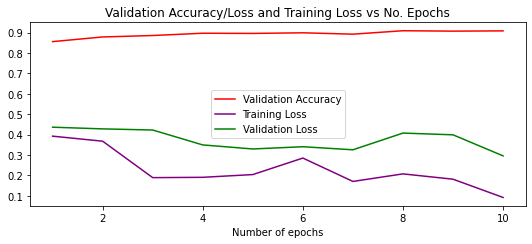

In [17]:
epochs = [None]*10
for i in range(10):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [18]:
num_epochs = 10
valid_loss_modified = [None] * 10
training_loss_modified = [None] * 10
valid_acc_modified = [None] * 10
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model_modified(images)
        loss = lossCriterion(outputs, labels)
        
        optim2.zero_grad()
        loss.backward()
        optim2.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = model_modified(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss_modified[index] = val_loss.item()
    training_loss_modified[index] = loss.item()
    valid_acc_modified[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}],\ttrain loss: {loss.item():.4f},\tval_loss: {val_loss.item():.4f},\tval_acc:{val_acc:.4f} %')

Epoch [2/10],	train loss: 0.1592,	val_loss: 0.3826,	val_acc:0.8703 %
Epoch [4/10],	train loss: 0.3022,	val_loss: 0.3116,	val_acc:0.8937 %
Epoch [6/10],	train loss: 0.2583,	val_loss: 0.3706,	val_acc:0.8955 %
Epoch [8/10],	train loss: 0.2894,	val_loss: 0.2928,	val_acc:0.8997 %
Epoch [10/10],	train loss: 0.1137,	val_loss: 0.3265,	val_acc:0.8978 %


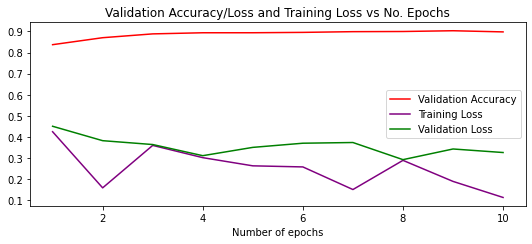

In [19]:
epochs = [None]*10
for i in range(10):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc_modified, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss_modified, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss_modified, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [23]:
!pip install ptflops
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=9e9f91d32d6e2be57c57f52558d716e1c7aa8006c95ef7a2acf2544afa2af6e3
  Stored in directory: /root/.cache/pip/wheels/b6/86/d5/cf62a3571b005f91cd9accefc5e10f40214538be997198afad
Successfully built ptflops
